##Analysis On Playstore Data

Let's take a look at the data, which consists of two files:

* Playstore data.csv: Contains all the details of the applications on Google
   Play. - Each app has details like category, rating, size, and more. There's also a dataset with customer reviews. Explore and analyze this data to find out what makes apps successful and engaging.
* user_reviews.csv: Contains 100 reviews for each app, most helpful first. The
  text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity. Before jumping into the data's provided, let me first explain you about the EDA analysis.


In [ ]:
Github_link='/content/Play Store Data.csv'

##Objectives Outliers

Distribution of App Ratings: What is the distribution of ratings across different apps?

Average Rating by Category: What is the average rating of apps in each category?

Number of Apps by Content Rating: How many apps fall under each content rating category?

Average App Size by Category: What is the average size of apps in different categories?

App Count by Category: How many apps are there in each category?

Correlation between Reviews and Rating: Is there a correlation between the number of reviews and the rating of apps?

Distribution of App Prices: What is the distribution of app prices?

Price Comparison by Category: How do app prices compare across different categories?

Content Rating by Category: What is the distribution of content ratings within each app category?

Genres with Highest Ratings: Which genres have the highest average ratings?

Installs Distribution: What is the distribution of the number of installs for apps?

Rating vs. Price: How does the price of an app affect its rating?

Top Rated Free vs. Paid Apps: How do the top-rated free apps compare to the top-rated paid apps?

Number of Reviews by Category: How many reviews do apps in each category receive on average?

Average Rating by Content Rating: What is the average rating of apps for each content rating category?

##Exploratory Data Analysis(EDA)
  Exploratory Data Analysis (EDA) is a key step in any Data Analysis or Data Science project. It helps you dive into your data to spot patterns, outliers (unusual data points), and form initial ideas about what the data is telling you. By using summary statistics and a range of visualizations, you can get a clear and attractive overview of the data’s main features. This process guides you on how to best work with your data to answer your key questions.

  Here are the key steps in the Exploratory Data Analysis (EDA) process, condensed into five points:
  1. Understand the Data: Study the dataset and its attributes to grasp their
     meaning and relevance to the problem.
  2.Develop Hypotheses: Form initial hypotheses based on the attributes to  
    guide your analysis
  3.Perform Analysis:
      Univariate Analysis: Examine single attributes to summarize and find patterns.
      Bivariate and Multivariate Analysis: Explore relationships between two or more attributes.
  4.Clean the Data: Handle missing data, outliers, and categorical        variables to prepare the dataset for analysis.
  5.Test Hypotheses: Verify if the data supports your hypotheses and meets the requirements for further analysis.


##  Explore Playstore Apps Data

##Import Useful Liabraries

In [ ]:
#Import ueseful liabraries
import pandas as pd # Data Manipulation Liabrary
import numpy as np # linear algebra
import matplotlib.pyplot as plt #Data Visulization Tool
import seaborn as sns
from datetime import datetime

In [ ]:
#load csv_file
file_path = '/content/Play Store Data.csv'
playstore_df=pd.read_csv(file_path)

In [ ]:
playstore_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


##Get the Null blanks and Dtype

In [ ]:
playstore_df.info()

In [ ]:
#finding the number of rows and columns in Dataset
print(playstore_df.columns)
rows=playstore_df.shape[0]
columns=playstore_df.shape[1]
print(f"The number of rows {rows} and columns {columns} in the dataset")


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
The number of rows 10841 and columns 13 in the dataset


In [ ]:
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


##Cleaning of Data

##Handling the Null values in the Playstore Data

In [ ]:
summary=pd.DataFrame({
    'datatypes':playstore_df.dtypes,
    'not null values':playstore_df.count(),
    'null_values':playstore_df.isnull().sum(),
    'unique_count':playstore_df.nunique()
})
summary

,datatypes,not null values,null_values,unique_count
App,object,10841,0,9660
Category,object,10841,0,34
Rating,float64,9367,1474,40
Reviews,object,10841,0,6002
Size,object,10841,0,462
Installs,object,10841,0,22
Type,object,10840,1,3
Price,object,10841,0,93
Content Rating,object,10840,1,6
Genres,object,10841,0,120


##Findings
   The number of null values in are:
        The "Rating" column has 1,474 missing values❓, which is about 13.60% of the data. The "Type" column has 1 missing value, making up 0.01% of the data. The "Content Rating" column also has 1 missing value, which is 0.01% of the data. The "Current Ver" column has 8 missing values, which is 0.07% of the data. Lastly, the "Android Ver" column has 3 missing values, accounting for 0.03% of the data.
   

## 1.)Null values in the Android Ver column

In [ ]:
#The Android Ver column containing Null vaules
playstore_df[playstore_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# Finding the different values the 'Android Ver' column takes
playstore_df["Android Ver"].value_counts()

,count
Android Ver,
4.1 and up,2451
4.0.3 and up,1501
4.0 and up,1375
Varies with device,1362
4.4 and up,980
2.3 and up,652
5.0 and up,601
4.2 and up,394
2.3.3 and up,281


In [ ]:
#Finding the shape of dataset
playstore_df.shape

(10841, 13)

## Drop three rows in Android ver column

In [ ]:
#Removing Nan values in Android ver column
playstore_df=playstore_df[playstore_df['Android Ver'].notna()]
playstore_df.shape

(10838, 13)

## we are successfully removed null values in Android  Ver column

## 2.) Current Ver: There are total 8 Null values in these column

In [ ]:
#Finding rows containing the null values in current ver column
playstore_df[playstore_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
#finding different values the current ver column takes
playstore_df['Current Ver'].value_counts()

,count
Current Ver,
Varies with device,1459
1.0,809
1.1,263
1.2,178
2.0,151
...,...
5.44.1,1
7.16.8,1
04.08.00,1


##since there are only 8 rows with Nan values in current ver column so we have to clean it from current ver column in the dataset

In [ ]:
#removing Null values from current ver column
playstore_df =playstore_df[playstore_df['Current Ver'].notna()]
# Shape of the updated dataframe
playstore_df.shape

(10830, 13)

## 3.)Rating: These column contain 1470 Nan values


In [ ]:
#The rows containing Nan values in Rating column
playstore_df[playstore_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


##Find the mean median in rating column excluding the Nan values

In [ ]:
mean_rating=round(playstore_df[~playstore_df['Rating'].isnull()]['Rating'].mean(),4)
median_rating=playstore_df[~playstore_df['Rating'].isnull()]['Rating'].median()
[mean_rating,median_rating]

[4.1918, 4.3]

##Visualization of Distribution of Rating using

<Axes: xlabel='Rating'>

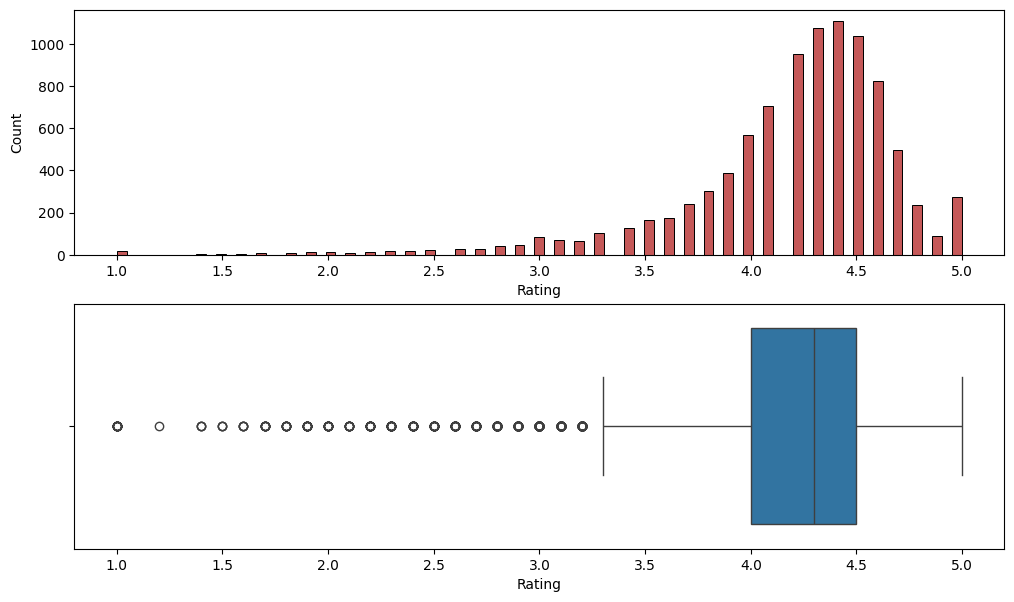

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(12,7))
sns.histplot(playstore_df['Rating'],color='firebrick',ax=ax[0])
sns.boxplot(x='Rating',data=playstore_df, ax=ax[1])

In [ ]:
#Replacing null values in rating column with its median value
playstore_df['Rating'].fillna(value=median_rating,inplace=True)

<ipython-input-33-1826843849b1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  playstore_df['Rating'].fillna(value=median_rating,inplace=True)


In [ ]:
playstore_df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,0
Genres,0


##Handling Duplicates values and Manipulation Dataset

In [ ]:
playstore_df[playstore_df['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [ ]:
playstore_df[playstore_df['App'] == 'Box']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device


In [ ]:
playstore_df.drop_duplicates(subset='App',inplace=True)

##Handling Duplicates and Manipulating Dataset

In [ ]:
playstore_df.shape

(9649, 13)

1.)  Changing the datatype of the Last Updated column from string to datetime.

In [ ]:

# Pandas to_datetime() function applied to the values in the last updated column helps to convert string Date time into Python Date time object.
playstore_df['Last Updated'] = pd.to_datetime(playstore_df['Last Updated'])

In [ ]:
playstore_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


2.) Change the price column from string to int float type

In [ ]:
playstore_df['Price'].value_counts()

,count
Price,
0,8896
$0.99,143
$2.99,124
$1.99,73
$4.99,70
...,...
$18.99,1
$389.99,1
$19.90,1


In [ ]:
def to_integer(n):
  if '$' in n:
    return float(n[1:])
  else:
    return float(n)

In [ ]:
playstore_df['Price'] = playstore_df['Price'].apply(lambda x:to_integer(x))

4.)Converting the values in the Installs column from string datatype to integer datatype.

In [ ]:
#checking the content of Installs column
playstore_df['Installs'].value_counts()

,count
Installs,
"1,000,000+",1416
"100,000+",1112
"10,000+",1029
"10,000,000+",937
"1,000+",886
100+,709
"5,000,000+",607
"500,000+",504
"50,000+",468


In [ ]:
def convert_integer(val):
  if '+' and ',' in val:
    new=int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1= int(val[:-1])
    return new1
  else:
    return int(val)

In [ ]:
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x:convert_integer(x))

In [ ]:
playstore_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up




*   The Installs column contains integer values indicating the minimum number of app installs, with 0 for no installs and higher values representing increasing user counts (e.g., 1 for at least one install, 1,000,000 for at least a million installs).

*  The datatype of the Installs column has been successfully converted from string to integer


4.) Converting the values in the Size column to a same unit of measure(MB)

In [ ]:
playstore_df['Size'].value_counts()

NameError: name 'playstore_df' is not defined

In [ ]:
## Defining a function to convert all the entries in KB to MB and then converting them to float datatype.
def convert_kb_to_mb(val):
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024,4)
    else:
      return val
  except:
    return val

##Applying the kb_to_mb function to convert the values in the Size column to a single unit of measure (MB) and the datatype from string to float


In [ ]:
# The kb_to_mb funtion applied to the size column
playstore_df['Size'] = playstore_df['Size'].apply(lambda x:convert_kb_to_mb(x))

In [ ]:
playstore_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: float(x))

In [ ]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.
max_size=playstore_df[playstore_df['Size'] != 'Varies with device']['Size'].max()

min_size = playstore_df[playstore_df['Size'] != 'Varies with device']['Size'].min()

mean_size = round(playstore_df[playstore_df['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = playstore_df[playstore_df['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 20.4136, 12.0]

<ipython-input-54-e3b335d3e4aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(playstore_df[playstore_df['Size'] != 'Varies with device']['Size'], ax=ax[0])


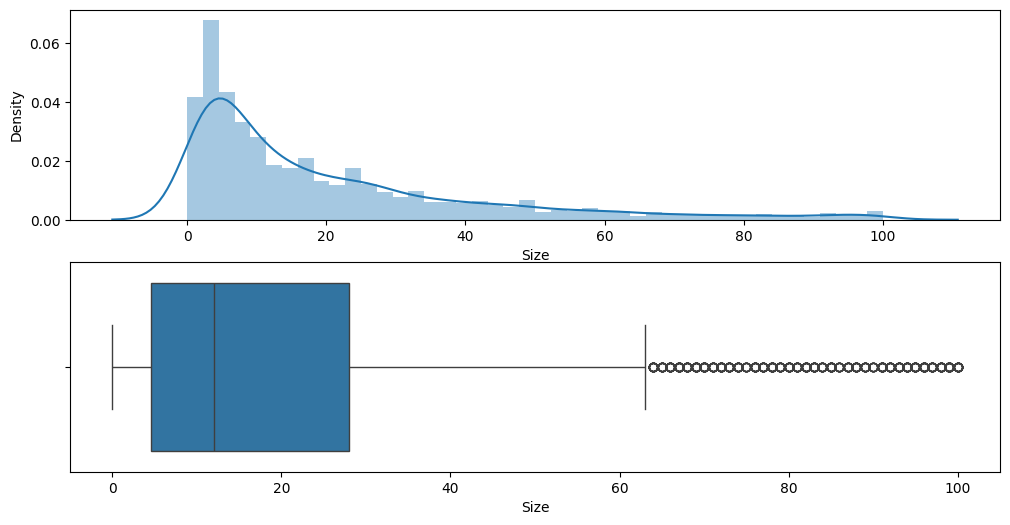

In [ ]:
# Distplot
fig, ax = plt.subplots(2,1, figsize=(12,6))
sns.distplot(playstore_df[playstore_df['Size'] != 'Varies with device']['Size'], ax=ax[0])
sns.boxplot(x='Size',data=playstore_df, ax=ax[1])
plt.show()

##Converting the datatype of values in the Reviews column from string to int.

In [ ]:
playstore_df['Reviews'] = playstore_df['Reviews'].astype(int)
playstore_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [ ]:
playstore_df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,9649.000000,9.649000e+03,8422.000000,9.649000e+03,9649.000000,9649
mean,4.192476,2.168145e+05,20.413556,7.785404e+06,1.100079,2017-10-31 01:35:57.612187648
min,1.000000,0.000000e+00,0.008300,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000,2017-08-08 00:00:00
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000,2018-05-05 00:00:00
75%,4.500000,2.944500e+04,28.000000,1.000000e+06,0.000000,2018-07-17 00:00:00
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.496528,1.832255e+06,21.833485,5.378557e+07,16.860857,NaN


##We have successfully converted the datatype of the values in the Reviews column from string to int.

##Data Exploration - Univariate & Bivariate Analysis



*  Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.


* Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features



In [ ]:
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

In [ ]:
playstore_df.to_csv('Final Playstore.csv')

Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

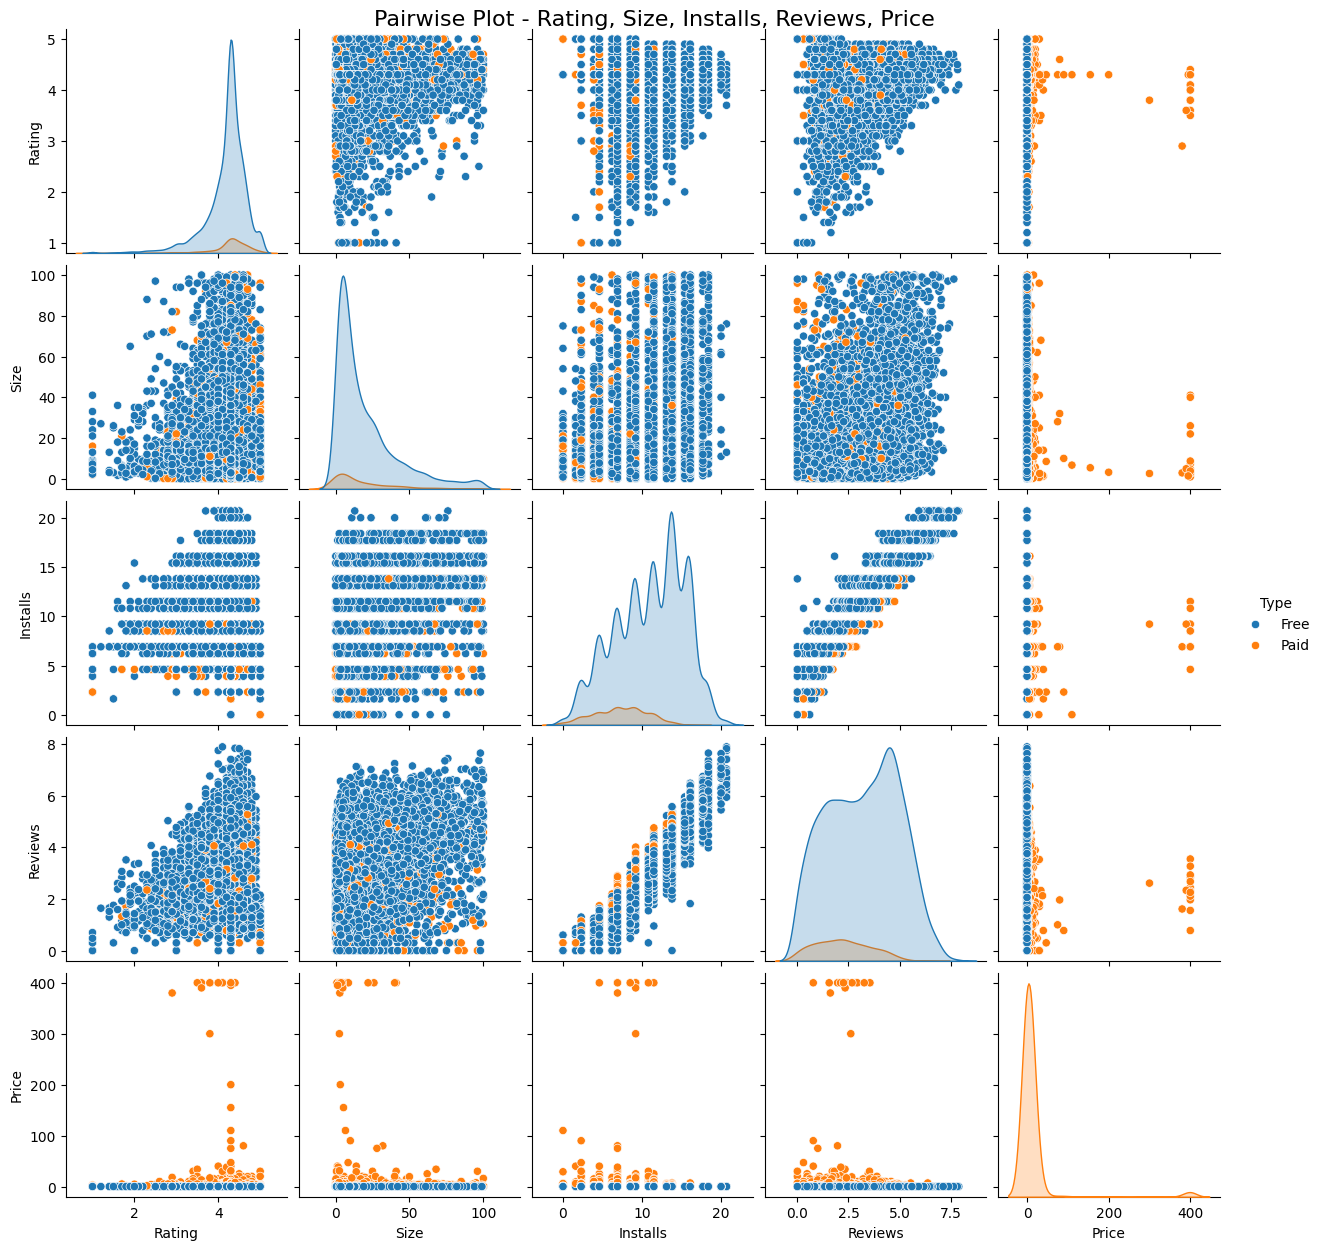

In [ ]:
Rating = playstore_df['Rating']
Size = playstore_df['Size']
Installs = playstore_df['Installs']
Reviews = playstore_df['Reviews']
Type = playstore_df['Type']
Price = playstore_df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)),
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

##Findings
Most of the App are Free. Most of the Paid Apps have Rating around 4 As the number of installation increases the number of reviews of the particaular app also increases. Most of the Apps are light-weighted.

##Explore User _ Review _ Data

In [ ]:
## Reading the userreviews.csv file
file_path2 = '/content/User Reviews.csv'
ur_df=pd.read_csv(file_path2)
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Checking shape and column in dataframe
print(ur_df.columns)
rows=ur_df.shape[0]
columns=ur_df.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
the no of rows is 64295 and no of columns is 5


In [ ]:
data=pd.DataFrame({'data_types':ur_df.dtypes,
                   'null_values':ur_df.isnull().sum(),
                   'not null values':ur_df.count(),
                    'unique_count':ur_df.nunique()
                    })

In [ ]:
data

,data_types,null_values,not null values,unique_count
App,object,0,64295,1074
Translated_Review,object,26868,37427,27994
Sentiment,object,26863,37432,3
Sentiment_Polarity,float64,26863,37432,5410
Sentiment_Subjectivity,float64,26863,37432,4474


##Findings


*  Translated_Review has 26868 null values which contributes 41.79% of the data.
*  Sentiment has 26863 null values which contributes 41.78% of the data.
* Sentiment_Polarity has 26863 null values which contributes 41.78% of the data.
* Sentiment_Subjectivity has 26863 null values which contributes 41.78% of the data.







##cleaning the user review DataFrame


##Handling errors and  the Null Values in the user reviews

In [ ]:
## Finding the total no of NaN values in each column.
ur_df.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [ ]:
# checking the NaN values in the translated review column
ur_df[ur_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


##There are a total of 26868 rows containing NaN values in the Translated_Review column.

We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity in the majority of the cases.

##Lets check if they are any exceptions

In [ ]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
ur_df[ur_df['Translated_Review'].isnull() & ur_df['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


##In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

##Hence these values are wrong and can be deleted altogather.

In [ ]:
#Delete the rows that containing Nan values
ur_df = ur_df.dropna()
#The shape of updated df
ur_df.shape

(37427, 5)

In [ ]:
##Inspecting the sentiment column
ur_df['Sentiment'].value_counts()

,count
Sentiment,
Positive,23998
Negative,8271
Neutral,5158


##Data Visualization on play store data:


##We have sucessfully cleaned the dirty data. Now we can perform some data visualization and come up with insights on the given datasets.

1.)Correlation Heatmap

In [ ]:
# Assuming playstore_df is your DataFrame
# Select only the numeric columns
numeric_df=playstore_df.select_dtypes(include=['float64','int64'])

##calculation of correlation matrix
correlation_matrix= numeric_df.corr()

correlation_matrix

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050212,0.045528,0.034306,-0.018674
Reviews,0.050212,1.000000,0.179275,0.625158,-0.007603
Size,0.045528,0.179275,1.000000,0.134216,-0.022494
Installs,0.034306,0.625158,0.134216,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.022494,-0.009412,1.000000


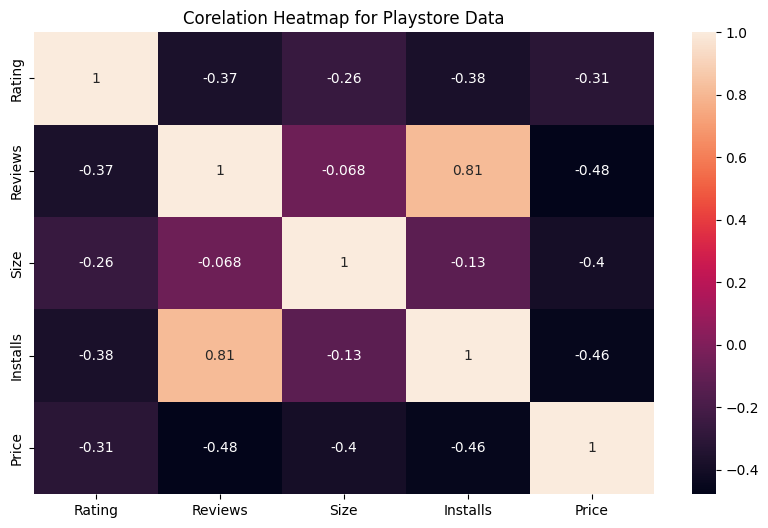

In [ ]:
#heat_map for playstore data
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix.corr(),annot=True)
plt.title('Corelation Heatmap for Playstore Data')
plt.show()



* There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
* The Priceis slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.

* The Rating is slightly positively correlated with theInstalls and Reviews column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.






2.) What is the ratio of number of Paid apps and Free apps?

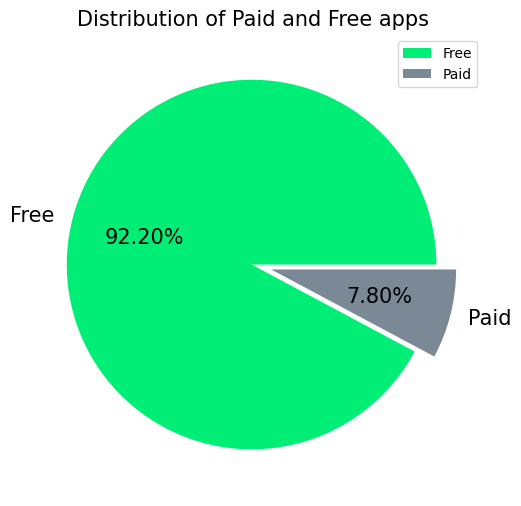

In [ ]:
data = playstore_df['Type'].value_counts()
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,6))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

##Findings
  
  * From the above graph we can see that 92% of apps in google play store are free and 8% are paid.





3.) Which category of Apps from the Content Rating column are found more on playstore?

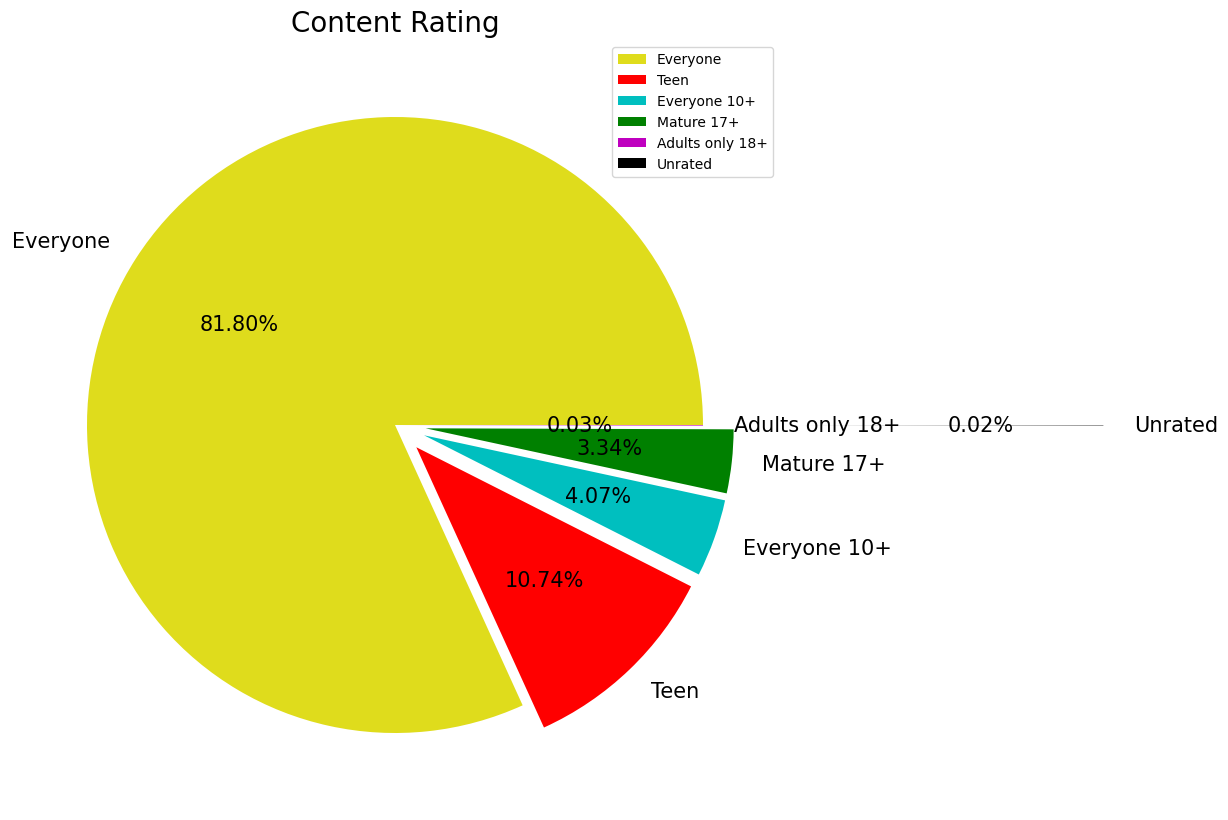

In [ ]:
#content rating of apps
data = playstore_df['Content Rating'].value_counts()
labels=['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

## craete a pie chart
plt.figure(figsize=(13,10))
colors=['#DFDC1C', 'r', 'c', 'g', 'm', 'k']
explode=(0,0.1,0.1,0.1,0.0,1.3)
plt.pie(data, labels = labels,colors = colors ,autopct='%0.2f%%',explode=explode,textprops={'fontsize':15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

##A majority of the apps (82%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.

## Top categories on playstore data

In [ ]:
playstore_df.groupby('Category')['App'].count().sort_values(ascending=False)

,App
Category,
FAMILY,1829
GAME,959
TOOLS,825
BUSINESS,420
MEDICAL,395
PERSONALIZATION,374
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [ ]:
x = playstore_df['Category'].value_counts()
y = playstore_df['Category'].value_counts().index

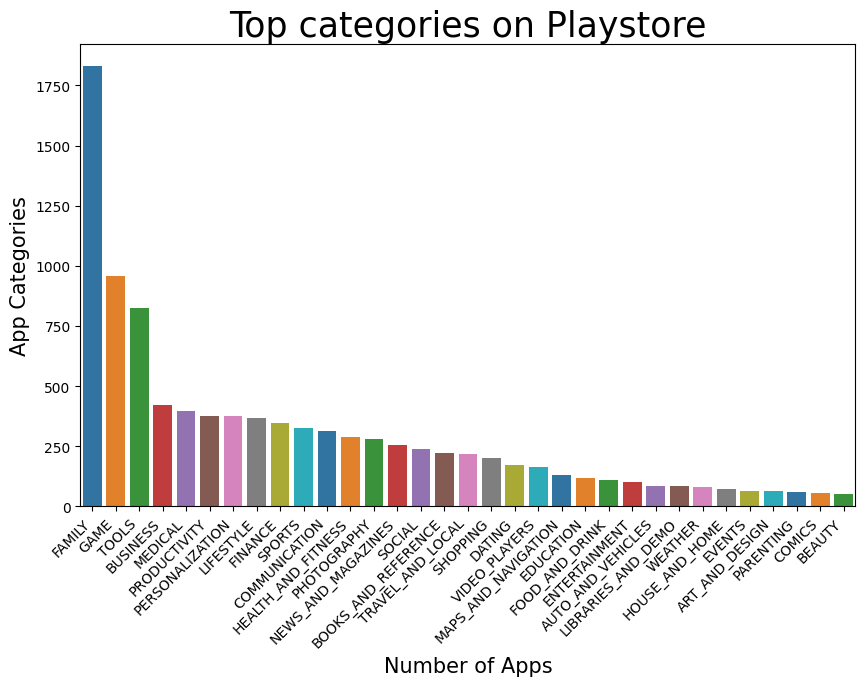

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(10,6))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x, x = y, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

##Findings


*  So there are all total 33 categories in the dataset From the above output we
   can come to a conclusion that in playstore most of the apps are underFAMILY & GAME category and least are of EVENTS & BEAUTY Category.
  



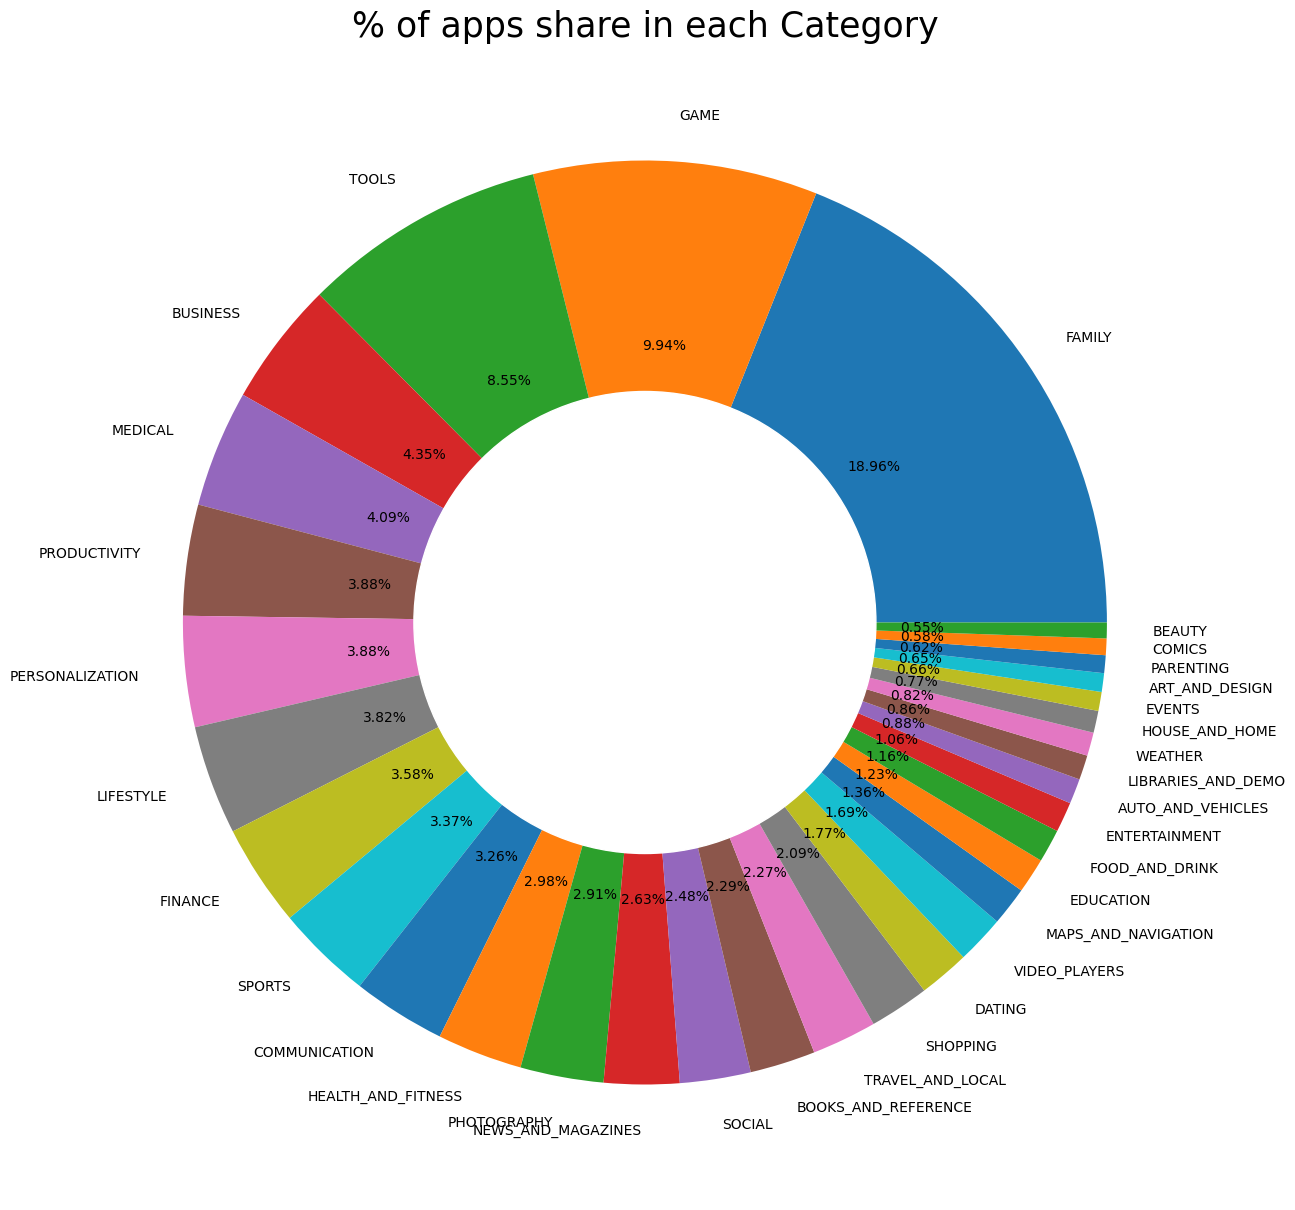

In [ ]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(20,15))
plt.pie(playstore_df.Category.value_counts(), labels=playstore_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

##Data Visualization on User Reviews:

1). Percentage of Review Sentiments

In [ ]:
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

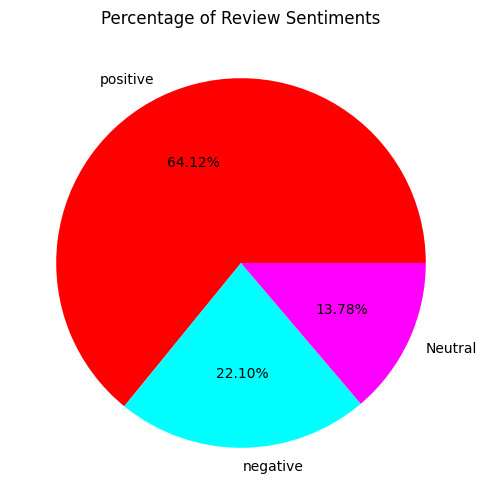

In [ ]:
data=ur_df['Sentiment'].value_counts()
labels=['positive','negative','Neutral']
plt.figure(figsize=(10,6))
colors=['red','aqua','magenta']
plt.title('Percentage of Review Sentiments')
plt.pie(data,labels=labels,colors=colors,autopct='%.2f%%')
plt.show()

##Findings



*  Positive reviews are 64.30%
*  Negative reviews are 22.80%
*  Neutral reviews are 12.90%

2.)App with highest number of positive reviews

In [ ]:
positive_ur_df=ur_df[ur_df['Sentiment']=='Positive']
positive_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


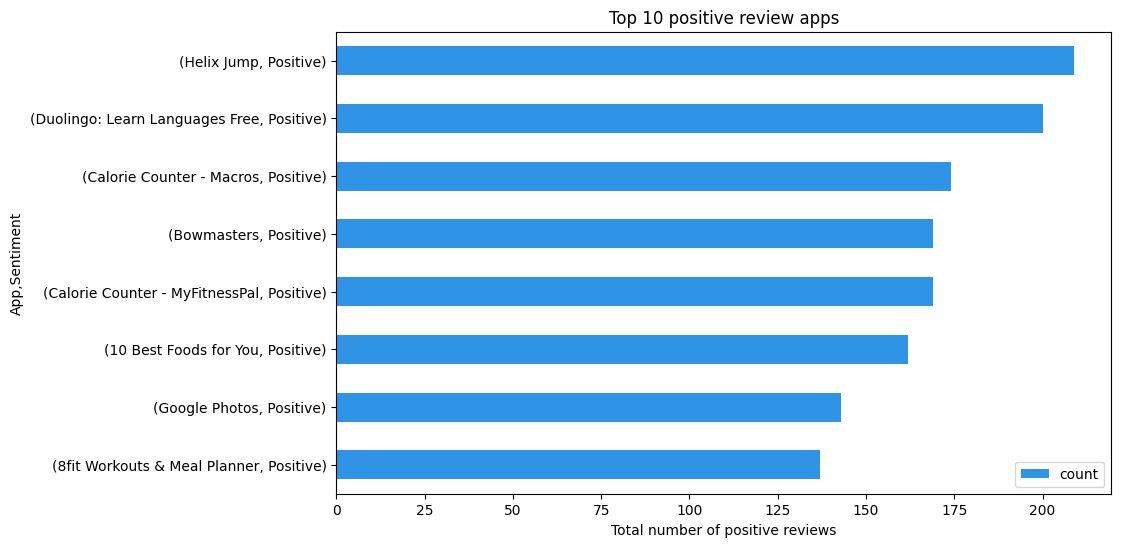

In [ ]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(8).plot.barh(figsize=(10,6),color='#3094e6').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

3.) App with Highest negative reviews

In [ ]:
negative_ur_df=ur_df[ur_df['Sentiment'] == 'Negative']

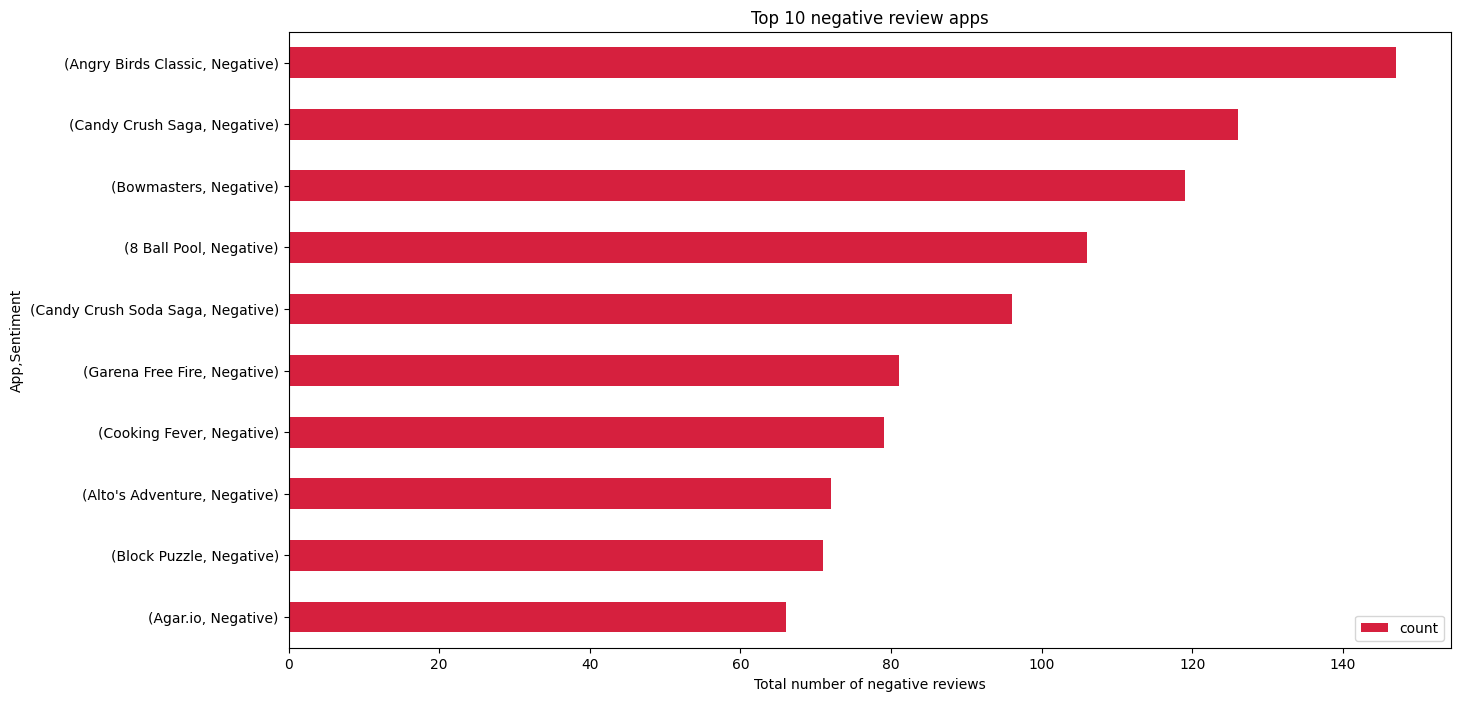

In [ ]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='#d6203e').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

##How content rating affect over the app


1.)Paid App content rating

In [ ]:
# Creating a df containing only paid apps
paid_df=playstore_df[playstore_df['Type']=='Paid']

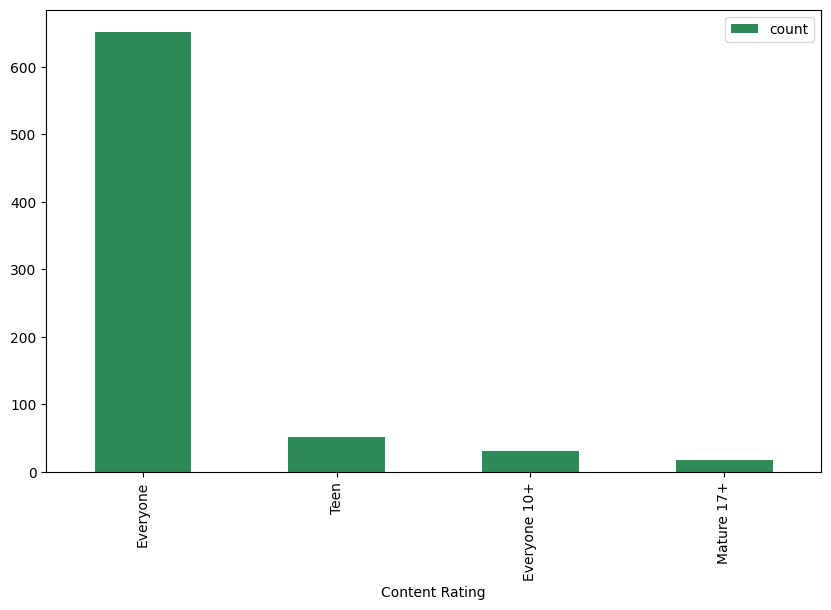

In [ ]:
paid_df['Content Rating'].value_counts().plot.bar(figsize=(10,6),color='seagreen')
plt.legend()

<Axes: xlabel='Price'>

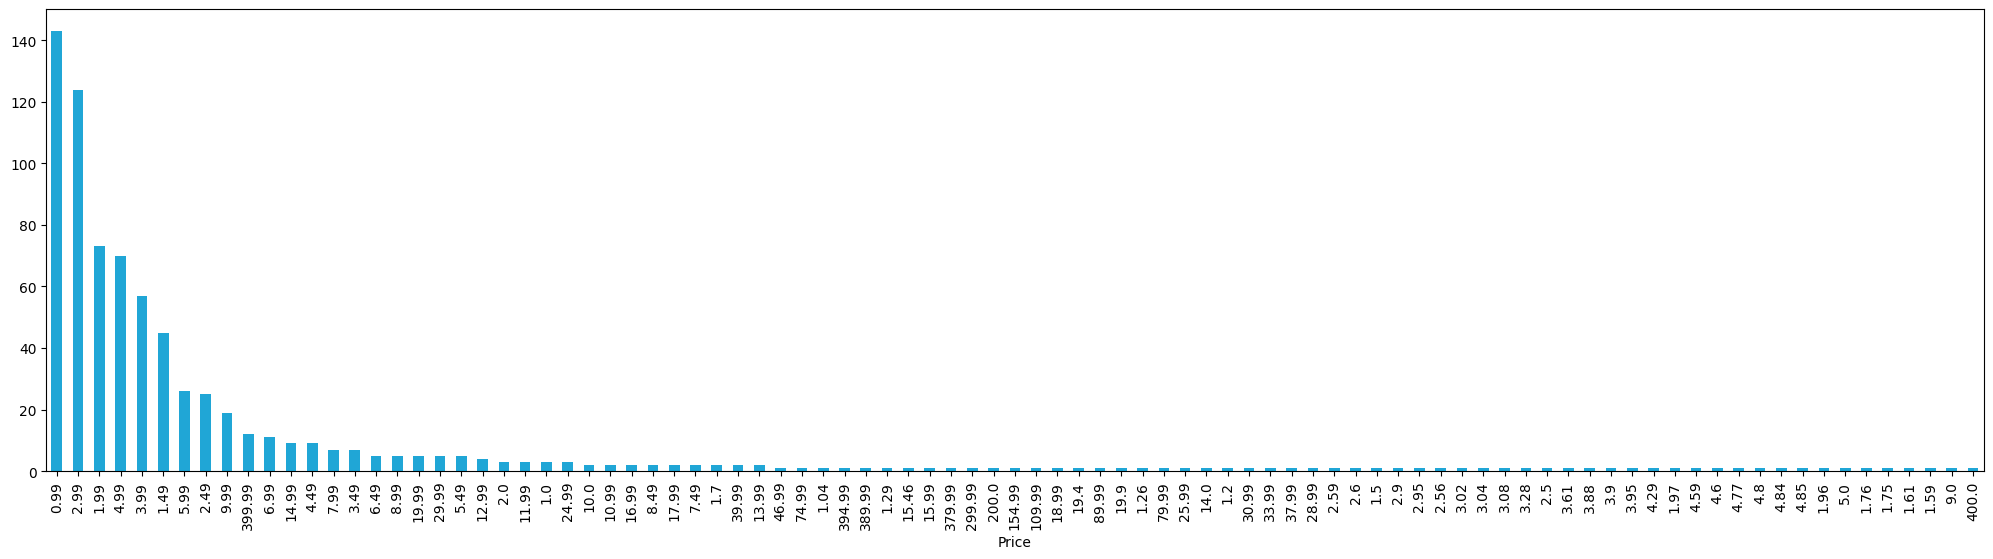

In [ ]:
#number of apps that can be installed at a particular price
paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (25,6), color = '#20a6d6')#

The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.

There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.

In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.

Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.

This is given by:

Revenue generated through installs = (Number of installs)x(Price to install the app)



##Lets define a new column Revenue in paid_df which gives the revenue generated by the app through installs alone.

In [ ]:
# Creatng a new column 'Revenue' in paid_df
paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,39900.0
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,6990.0


In [ ]:
# Top app in the paid category
paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0


In [ ]:
# Top 10 paid apps in the play store
top10paid_apps=paid_df.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

,App
2241,Minecraft
5351,I am rich
5356,I Am Rich Premium
4034,Hitman Sniper
7417,Grand Theft Auto: San Andreas
2883,Facetune - For Free
5578,Sleep as Android Unlock
8804,DraStic DS Emulator
4367,I'm Rich - Trump Edition
4362,💎 I'm rich


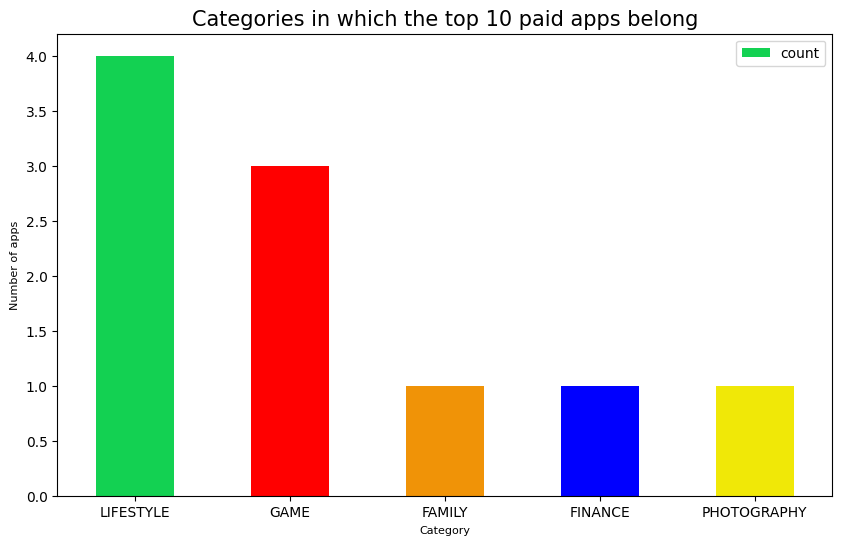

In [ ]:
# Categories in which the top 10 paid apps belong to
top10paid_apps['Category'].value_counts().plot.bar(figsize=(10,6), color= ["#13d152", "red", "#f09307", "blue", "#f0e807"])
plt.xlabel('Category',size=8)
plt.ylabel('Number of apps',size=8)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()


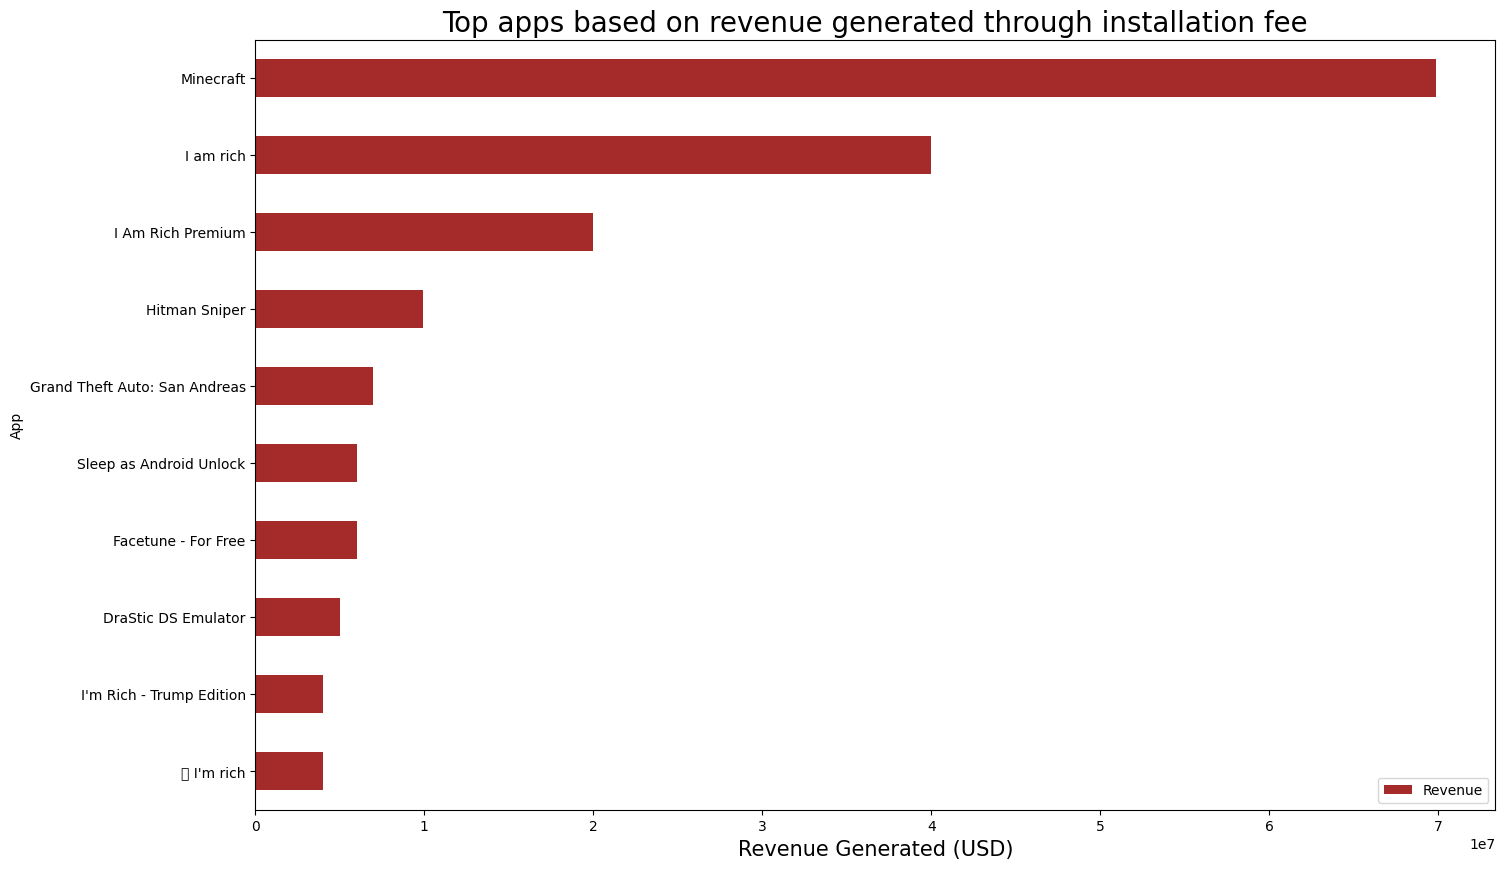

In [ ]:
# Top paid apps according to the revenue generated through installs alone
top10paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(16,10), color='brown')
plt.xlabel('Revenue Generated (USD)', size=15)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend()

##Distribution of App update over the Year

In [ ]:
# Creating a df for only free apps
free_df = playstore_df[playstore_df['Type'] == 'Free']

In [ ]:
paid_df["Update year"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')
free_df["Update year"] = free_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')

<Axes: xlabel='Update year'>

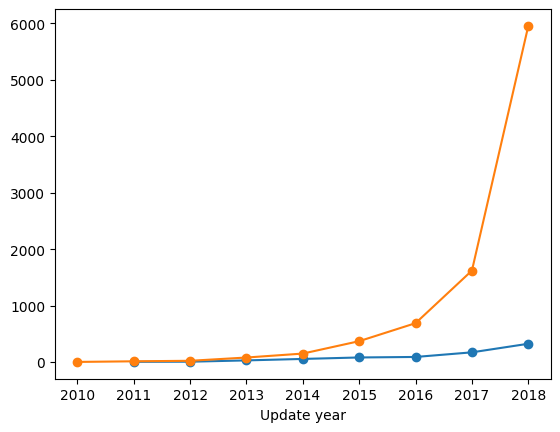

In [ ]:
paid_df.groupby("Update year")["App"].count().plot.line(marker='o')
free_df.groupby('Update year')['App'].count().plot.line(marker='o')

n the above plot, we plotted the apps updated or added over the years comparing Free vs. Paid, by observing this plot we can conclude that before 2011 there were no paid apps, but with the years passing free apps has been added more in comparison to paid apps, By comparing the apps updated or added in the year 2011 and 2018 free apps are increases from 80% to 96% and paid apps are goes from 20% to 4%. So we can conclude that most of the people are after free apps

##Distribution of Paid and Free app updated over the Month

In [ ]:
paid_df["Update month"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64')
free_df["Update month"] = free_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64')

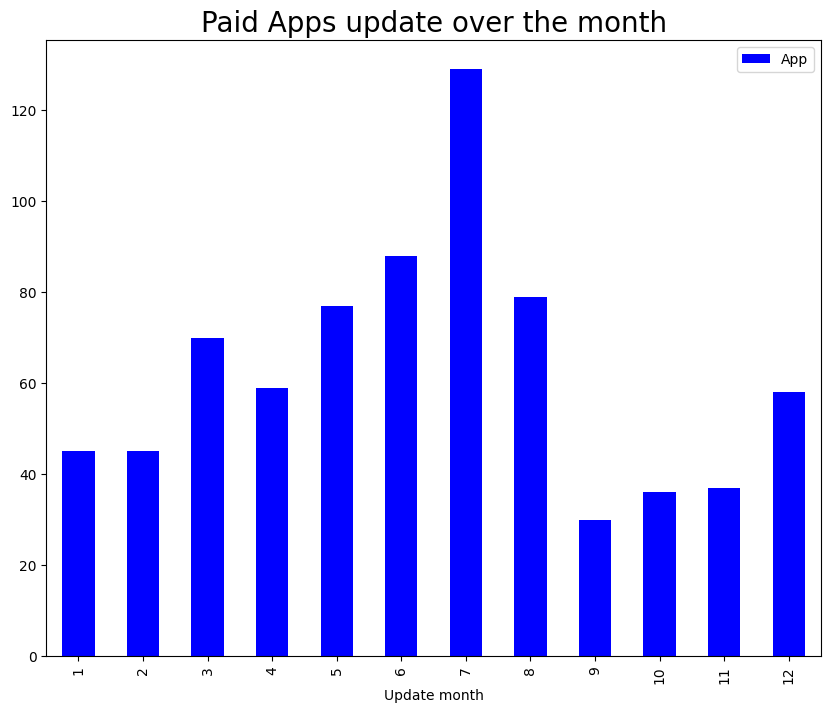

In [ ]:
paid_df.groupby("Update month")["App"].count().plot.bar(figsize=(10,8), color= "blue")
plt.title("Paid Apps update over the month", size=20)
plt.legend()

##Most of the paid apps too updates in the month of July same as free apps.

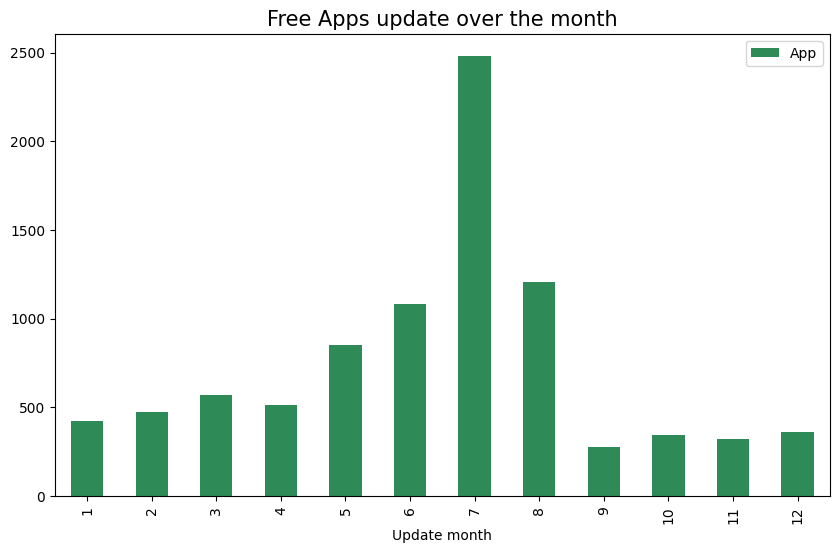

In [ ]:
free_df.groupby("Update month")["App"].count().plot.bar(figsize=(10,6), color='seagreen')
plt.title("Free Apps update over the month", size=15)
plt.legend()

##In this data almost 50% apps are added or updated on the month of July, 25% of apps are updated or added on the month of August and rest of 25% remaining months

##Playstore App Analysis Report

In our analysis of Play Store applications, we aimed to provide AlmaBetter with actionable insights to enhance their app launches.

Intial Phase



*   Problem Statements & Data Cleaning: We began by clearly defining the problems and meticulously cleaning the data to ensure high-quality analysis.




Key Recommendations:

*   Target Underexplored Categories: Focus on developing apps in less saturated categories like events and beauty.
*   Emphasize Free Apps: With the majority of apps being free, AlmaBetter should prioritize free app offerings.
* Content for Everyone: Apps catering to all age groups tend to get more installs.

* Regular Updates: Frequent updates can attract and retain more users.

* User Sentiment & Needs: Pay close attention to user feedback and evolving needs to enhance app features and user satisfaction.






##Analysis Highlights:


* Free Apps: ~92% of apps are free.
* No Age Restrictions: ~82% of apps are available for all age groups.
* Competitive Category: The most competitive category is Family.
* Highest Average Installs: Games category leads with the highest average installs.
* Top Rated Apps: ~80% of apps are top-rated.
* Top Categories by App Count: Family (1906 apps), Game (926 apps), Tools (829 apps).
* Top Genres: Tools, Entertainment, Education, Business, Medical.
* App Size Insights:
   * 8783 apps are under 50 MB.
   * 7749 apps have ratings above 4.0.
   * Median app size is 12 MB.
   * Apps with variable sizes have the highest average installs.
   * Apps over 90 MB receive the most user reviews.



   ##Install Statistics:

* 20 free apps have over a billion installs.
* Minecraft is the only paid app with over 10 million installs, generating the
  most revenue from installation fees.
* Finance category has the highest average installation fee for paid apps.


##User Reviews:
 * Helix Jump has the highest number of positive reviews
 * Angry Birds Classic has the highest number of negative reviews.

##Sentiment Analysis:
* Positive: 64%
* Negative: 22%
* Neutral: 13%
##These insights provide a comprehensive understanding of the Play Store landscape, aiding AlmaBetter in making informed decisions for their app development and marketing strategies.

##Challenges & Future Work

Challenges:

1. Data Cleaning: One of our primary challenges was the extensive data cleaning
    required.
2. Missing Reviews: We encountered 13.60% NaN values in reviews. Even after
   merging dataframes, these missing values could not be inferred and were subsequently dropped.
3.Limited Merged Data: The merged dataframe of Play Store and user reviews     contained only 816 common apps, representing just 10% of the cleaned data. More valuable insights could have been derived if we had 70%-80% of the data in the merged dataframes.
4. High NaN Values in User Reviews: User reviews had 42% NaN values. If these
 values were available, they could have provided a better understanding of category-wise sentiments and potentially helped fill the 13.60% NaN values in the Reviews column.

##Future Work:
1. Version Analysis: Exploring the impact of current and Android versions on app performance to provide more detailed analysis for developers.
2. Correlation Studies: Investigate the correlation between app size, Android version, and the number of installs.
3. Machine Learning Models: Develop machine learning models to derive deeper insights and improve interpretability. This future work could significantly enhance our analysis capabilities.